# KNN and ANN

## 3.1 KNN

In [1]:
import numpy as np

from icecream import ic

In [2]:
def euclidean_distance(query, database):
    query_sq = np.sum(query ** 2, axis=1, keepdims=True)  # Shape: (10000, 1)
    database_sq = np.sum(database ** 2, axis=1, keepdims=True).T  # Shape: (1, 50000)
    dot_product = np.dot(query, database.T)  # Shape: (10000, 50000)

    return np.sqrt(query_sq + database_sq - 2 * dot_product)

def cosine_distance(query, database):
    query_norm = np.linalg.norm(query, axis=1, keepdims=True) + 1e-10
    database_norm = np.linalg.norm(database, axis=1, keepdims=True).T + 1e-10
    similarity = np.dot(query / query_norm, (database / database_norm).T)
    return 1 - similarity


def compute_distances(query, database, metric='euclidean'):
    if metric == 'euclidean':
        return euclidean_distance(query, database)
    else:  # metric == 'cosine'
        return cosine_distance(query, database)

def knn(query, database, k=1, metric='euclidean'):
    distances = compute_distances(query, database, metric)
    return np.argsort(distances, axis=1)[:, :k]

def accuracy(predictions, true_labels):
    return np.mean(predictions == true_labels)

def mean_reciprocal_rank(results, ground_truth):
    ranks = []
    for i, res in enumerate(results):
        rank = np.where(np.isin(res, ground_truth[i]))[0]  # Find ranks of correct matches
        if len(rank) > 0:
            ranks.append(1 / (rank[0] + 1))  # Take the first correct match
        else:
            ranks.append(0)
    return np.mean(ranks)

def precision_at_k(results, ground_truth, k=100):
    return np.mean([len([x for x in res[:k] if x in ground_truth[i]]) / k for i, res in enumerate(results)])

def hit_rate(results, ground_truth, k=100):
    return np.mean([any(x in ground_truth[i] for x in res[:k]) for i, res in enumerate(results)])


In [3]:
import torch

test_embeddings = torch.load("data/test_embeddings.pth").cpu().numpy()
test_labels = torch.load("data/test_labels.pth").cpu().numpy()
text_embeddings = torch.load("data/text_embedding.pth").cpu().numpy()
train_embeddings = torch.load("data/train_embeddings.pth").cpu().numpy()
train_labels = torch.load("data/train_labels.pth").cpu().numpy()


In [4]:
from collections import Counter

labels_semantics = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

def get_label_predictions(knn_values):
    index_to_labels = train_labels[knn_values]

    mapped = labels_semantics[np.array(index_to_labels)]

    most_common_labels = [Counter(row).most_common(1)[0][0] for row in mapped]
    
    return np.array(most_common_labels)

### Task 1: Classification

`Part A:` Classify each image in the test set using the labels of the k nearest neighbours from the train
set. Report the accuracy for 3 different values of k(1, 5, 10) and cosine and eucledian distance
metrics (2 Marks).

#### Subpart 1: Euclidean distances for k = 1, 5, 10

In [5]:
k_1_values_euclidean = knn(test_embeddings, train_embeddings, k = 1, metric = "euclidean")

k_5_values_euclidean = knn(test_embeddings, train_embeddings, k = 5, metric = "euclidean")

k_10_values_euclidean = knn(test_embeddings, train_embeddings, k = 10, metric = "euclidean")

k_x_euclidean = [k_1_values_euclidean, k_5_values_euclidean, k_10_values_euclidean]

In [6]:
print(k_1_values_euclidean.shape)
print(k_5_values_euclidean.shape)
print(k_10_values_euclidean.shape)

(10000, 1)
(10000, 5)
(10000, 10)


In [7]:
# for k_x_eu in k_x_euclidean:
print(get_label_predictions(k_1_values_euclidean))
print(get_label_predictions(k_5_values_euclidean))
print(get_label_predictions(k_10_values_euclidean))

['frog' 'ship' 'ship' ... 'dog' 'airplane' 'horse']
['frog' 'ship' 'ship' ... 'dog' 'airplane' 'horse']
['cat' 'ship' 'ship' ... 'dog' 'airplane' 'horse']


In [8]:
index_to_labels_k_1_eu = train_labels[k_1_values_euclidean]
index_to_labels_k_5_eu = train_labels[k_5_values_euclidean]
index_to_labels_k_10_eu = train_labels[k_10_values_euclidean]


most_common_labels_k_1_eu = np.array([Counter(row).most_common(1)[0][0] for row in index_to_labels_k_1_eu])
most_common_labels_k_5_eu = np.array([Counter(row).most_common(1)[0][0] for row in index_to_labels_k_5_eu])
most_common_labels_k_10_eu = np.array([Counter(row).most_common(1)[0][0] for row in index_to_labels_k_10_eu])

In [9]:
print("Accuracy for k = 1:", accuracy(most_common_labels_k_1_eu, test_labels) * 100, "%")
print("Accuracy for k = 5:", accuracy(most_common_labels_k_5_eu, test_labels)* 100, "%")
print("Accuracy for k = 10:", accuracy(most_common_labels_k_10_eu, test_labels)* 100, "%")

Accuracy for k = 1: 90.48 %
Accuracy for k = 5: 91.9 %
Accuracy for k = 10: 92.07 %


In [10]:
import gc

del k_1_values_euclidean, k_5_values_euclidean, k_10_values_euclidean, k_x_euclidean

gc.collect()


for var in ["k_1_values_euclidean", "k_5_values_euclidean", "k_10_values_euclidean", "k_x_euclidean"]:
    if var in locals():
        del locals()[var]

gc.collect()

0

In [ ]:
k_1_values_cosine = knn(test_embeddings, train_embeddings, k = 1, metric = "cosine")

In [ ]:
k_1_values_cosine = knn(test_embeddings, train_embeddings, k = 1, metric = "cosine")

k_5_values_cosine = knn(test_embeddings, train_embeddings, k = 5, metric = "cosine")

k_10_values_cosine = knn(test_embeddings, train_embeddings, k = 10, metric = "cosine")

k_x_cosine = [k_1_values_cosine, k_5_values_cosine, k_10_values_cosine]

`Part B:` Instead of using the train set to predict the labels, now use the text embeddings to predict the
labels. Using k = 1, get the text embedding closest to each image and predict the accuracy (2
Marks)

In [11]:
distances_text = compute_distances(test_embeddings, text_embeddings, metric = "euclidean")
k_1_values_text = knn(test_embeddings, text_embeddings, k = 1, metric = "euclidean")

In [12]:
mapped_text = labels_semantics[np.array(k_1_values_text)]

In [13]:
np.array(k_1_values_text)

k_1_values_text.flatten()

array([3, 8, 8, ..., 5, 0, 7])

In [14]:
test_labels

array([3, 8, 8, ..., 5, 1, 7])

In [15]:
mapped_text

array([['cat'],
       ['ship'],
       ['ship'],
       ...,
       ['dog'],
       ['airplane'],
       ['horse']], dtype='<U10')

Accuracy

In [16]:
print("Accuracy =", accuracy(k_1_values_text.flatten(), test_labels) * 100, "%")


Accuracy = 87.81 %


#### Task 2: Retreival

`Part A:` Text to Image Retrieval: For each text embedding retrieve the 100 nearest embeddings from the
train set and report the 3 metrics: Mean reciprocal rank, precision@100 and hit rate. (2 Marks)

In [17]:
text_to_image = knn(text_embeddings, train_embeddings, k=100, metric="euclidean")

In [18]:
text_to_image

results_text_part_1 = get_label_predictions(text_to_image)

In [30]:
mrr_part_1 = mean_reciprocal_rank(results_text_part_1, labels_semantics)
pat_part_1 = precision_at_k(results_text_part_1, labels_semantics)
hr_part_1 = hit_rate(results_text_part_1, labels_semantics)



print("Mean Reciprocal Rank:", mrr_part_1)
print("Precision@100:", pat_part_1)
print("Hit Rate:", hr_part_1)

Mean Reciprocal Rank: 1.0
Precision@100: 0.05
Hit Rate: 1.0


/tmp/ipykernel_26294/1492455321.py:31: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  rank = np.where(np.isin(res, ground_truth[i]))[0]  # Find ranks of correct matches


`Part B:` Image to Image Retrieval: For each test embedding retrieve the 100 nearest embeddings from
train set and report the metrics mentioned above. (2 Marks)

In [31]:
image_to_image = knn(test_embeddings, train_embeddings, k = 100, metric = "euclidean")

In [32]:
results_im_to_im_part_1 = get_label_predictions(image_to_image)

test_labels_with_semantics = get_label_predictions(np.array(test_labels).reshape(len(test_labels), 1))

In [33]:
results_im_to_im_part_1

array(['frog', 'ship', 'ship', ..., 'dog', 'airplane', 'horse'],
      dtype='<U10')

In [34]:
test_labels_with_semantics

array(['deer', 'ship', 'ship', ..., 'automobile', 'truck', 'horse'],
      dtype='<U10')

In [36]:
mrr_im_to_im_part_1 = mean_reciprocal_rank(results_im_to_im_part_1, test_labels_with_semantics)
pat_im_to_im_part_1 = precision_at_k(results_im_to_im_part_1, test_labels_with_semantics)
hr_im_to_im_part_1 = hit_rate(results_im_to_im_part_1, test_labels_with_semantics)



print("Mean Reciprocal Rank:", mrr_im_to_im_part_1)
print("Precision@100:", pat_im_to_im_part_1)
print("Hit Rate:", hr_im_to_im_part_1)

Mean Reciprocal Rank: 0.1935
Precision@100: 0.018963
Hit Rate: 0.9017


/tmp/ipykernel_26294/1492455321.py:31: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  rank = np.where(np.isin(res, ground_truth[i]))[0]  # Find ranks of correct matches


## 3.2 Locally Sensitive Hashing

#### `Task 1:` Implement LSH following the article linked above using random hyperplanes.

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch

from scipy.spatial.distance import cdist

import numpy as np

class LSH:
    def __init__(self, num_hyperplanes, dim):
        self.num_hyperplanes = num_hyperplanes
        self.dim = dim
        self.hyperplanes = np.random.randn(num_hyperplanes, dim)
        self.buckets = dict()

    def hash_vector(self, vec):
        return tuple((vec @ self.hyperplanes.T) > 0)

    def insert(self, vec, index):
        hash_key = self.hash_vector(vec)
        if hash_key not in self.buckets:
            self.buckets[hash_key] = []
        self.buckets[hash_key].append(index)

    def query(self, query_vec, top_k=5):
        hash_key = self.hash_vector(query_vec)
        
        candidates = self.buckets.get(hash_key, [])
        
        if len(candidates) == 0:
            return [], []

        candidate_vectors = train_embeddings[candidates]  # Assuming train_embeddings is available
        distances = cdist([query_vec], candidate_vectors, metric='euclidean').flatten()
        
        top_k_indices = np.argsort(distances)[:top_k]
        
        return [candidates[i] for i in top_k_indices], distances[top_k_indices]


test_embeddings = torch.load("data/test_embeddings.pth").cpu().numpy()
train_embeddings = torch.load("data/train_embeddings.pth").cpu().numpy()
train_labels = torch.load("data/train_labels.pth").cpu().numpy()
test_labels = torch.load("data/test_labels.pth").cpu().numpy()

n, d = train_embeddings.shape

query_vector = test_embeddings[0]

num_hyperplanes = 7
lsh = LSH(num_hyperplanes, d)

for idx, vec in tqdm(enumerate(train_embeddings), total = n, desc=f"LSH {num_hyperplanes}"):
    lsh.insert(vec, idx)

top_k_indices, top_k_distances = lsh.query(query_vector, top_k=5)

print("Top-5 closest vectors to the query:")
for idx, dist in zip(top_k_indices, top_k_distances):
    print(f"Index: {idx}, Distance: {dist}")

for i in top_k_indices:
    print(train_labels[i])


from collections import Counter

labels_semantics = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

train_labels = torch.load("data/train_labels.pth").cpu().numpy()

def get_label_predictions(knn_values):

    index_to_labels = train_labels[knn_values]

    mapped = labels_semantics[np.array(index_to_labels)]

    mapped = mapped.reshape(1, len(mapped))


    most_common_labels = [Counter(np.array(row).flatten()).most_common(1)[0][0] for row in mapped]
    
    return np.array(most_common_labels)

print(top_k_indices)

print(get_label_predictions(np.array(top_k_indices).reshape(len(top_k_indices), 1)))

print(labels_semantics[test_labels[0]])

total = 10000

final_label_values = []

for test_embedding in tqdm(test_embeddings[:total]):
    top_k_indices, top_k_distances = lsh.query(test_embedding, top_k=5)

    if len(top_k_distances) == 0:
        print("Haan zero wala mila")
        final_label_values.append([labels_semantics[0]])
        continue

    final_label_values.append(get_label_predictions(np.array(top_k_indices).reshape(len(top_k_indices), 1)))


def mean_reciprocal_rank(results, ground_truth):
    ranks = []
    for i, res in enumerate(results):
        rank = np.where(np.isin(res, ground_truth[i]))[0]
        if len(rank) > 0:
            ranks.append(1 / (rank[0] + 1))
        else:
            ranks.append(0)
    return np.mean(ranks)

def precision_at_k(results, ground_truth, k=100):
    return np.mean([len([x for x in res[:k] if x in ground_truth[i]]) / k for i, res in enumerate(results)])

def hit_rate(results, ground_truth, k=100):
    return np.mean([any(x in ground_truth[i] for x in res[:k]) for i, res in enumerate(results)])

final_label_values = np.array(final_label_values).squeeze()

print(np.array(final_label_values).squeeze())
print(labels_semantics[test_labels[:total]])

def accuracy(predictions, labels):
    return np.sum(predictions == labels, axis = 0) / len(predictions)

acc = accuracy(final_label_values, labels_semantics[test_labels[:total]])

mrr = mean_reciprocal_rank(final_label_values, labels_semantics[test_labels[:total]])

pak = precision_at_k(final_label_values, labels_semantics[test_labels[:total]])

hr = hit_rate(final_label_values, labels_semantics[test_labels[:total]])

print("Accuracy:", acc * 100, "%")
print("Mean Reciprocal Rank:", mrr)
print("Precision at k:", pak)
print("Hit Rate:", hr)

LSH 7: 100%|██████████| 50000/50000 [00:00<00:00, 298326.96it/s]


Top-5 closest vectors to the query:
Index: 29022, Distance: 0.4306750254629287
Index: 4074, Distance: 0.44235204338585976
Index: 9832, Distance: 0.44417299717069014
Index: 44913, Distance: 0.45959245711660845
Index: 3223, Distance: 0.4615476463835826
5
5
5
3
6
[29022, 4074, 9832, 44913, 3223]
['dog']
cat


  5%|▌         | 533/10000 [00:03<00:51, 185.10it/s]

Haan zero wala mila


 30%|███       | 3021/10000 [00:18<00:34, 200.35it/s]

Haan zero wala mila


 44%|████▍     | 4403/10000 [00:25<00:24, 228.80it/s]

Haan zero wala mila


100%|██████████| 10000/10000 [00:55<00:00, 179.35it/s]
/tmp/ipykernel_40013/1537268632.py:109: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  rank = np.where(np.isin(res, ground_truth[i]))[0]


['dog' 'ship' 'ship' ... 'dog' 'airplane' 'horse']
['cat' 'ship' 'ship' ... 'dog' 'automobile' 'horse']
Accuracy: 89.99000000000001 %
Mean Reciprocal Rank: 0.8999
Precision at k: 0.04656300000000001
Hit Rate: 0.9619


Inserting vectors with 5 hyperplanes...


LSH 5: 100%|██████████| 50000/50000 [00:00<00:00, 165533.49it/s]


Inserting vectors with 10 hyperplanes...


LSH 10: 100%|██████████| 50000/50000 [00:00<00:00, 149537.44it/s]


Inserting vectors with 20 hyperplanes...


LSH 20: 100%|██████████| 50000/50000 [00:00<00:00, 123805.25it/s]


Inserting vectors with 50 hyperplanes...


LSH 50: 100%|██████████| 50000/50000 [00:02<00:00, 18334.54it/s]


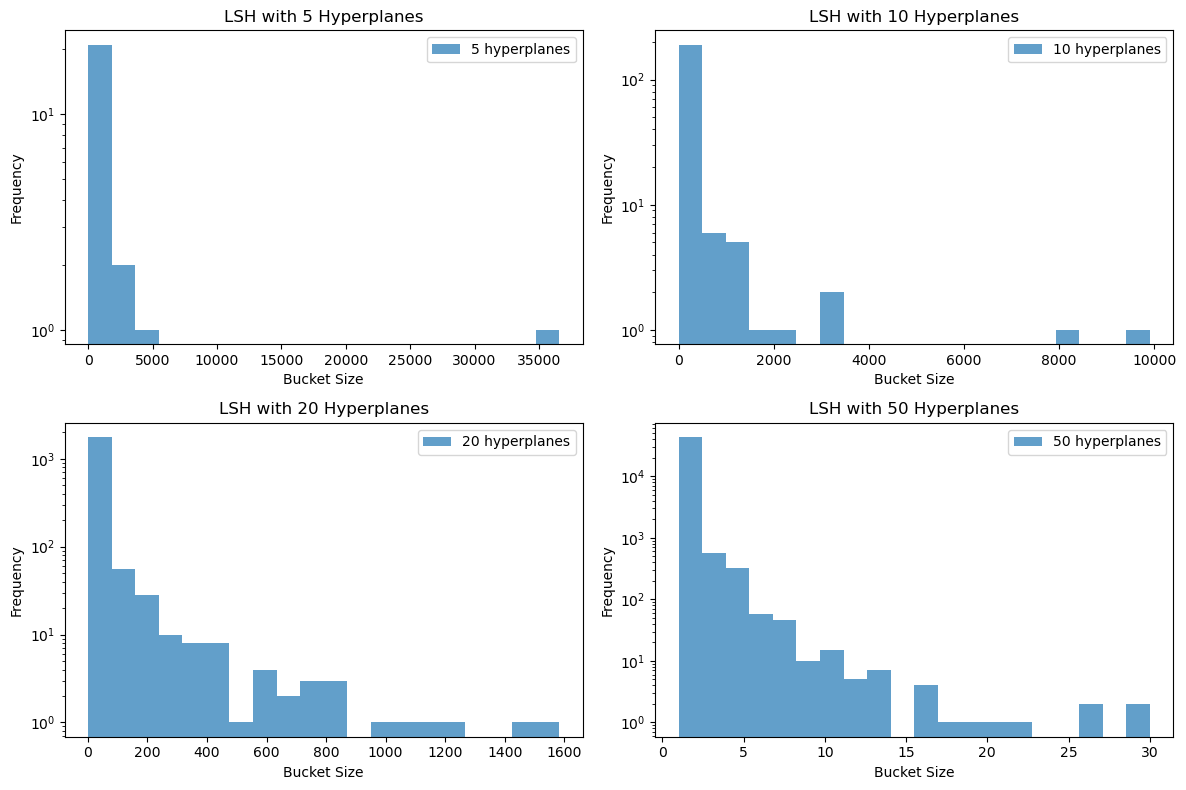

In [2]:
n, d = train_embeddings.shape
num_hyperplanes_list = [5, 10, 20, 50]

for i, num_hyperplanes in enumerate(num_hyperplanes_list):
    lsh = LSH(num_hyperplanes, d)

    print(f"Inserting vectors with {num_hyperplanes} hyperplanes...")
    for idx, vec in tqdm(enumerate(train_embeddings), total=n, desc=f"LSH {num_hyperplanes}"):
        lsh.insert(vec, idx)

    bucket_sizes = [len(v) for v in lsh.buckets.values()]

    ax = axes[i]
    ax.hist(bucket_sizes, bins=20, alpha=0.7, label=f'{num_hyperplanes} hyperplanes')
    ax.set_yscale("log")
    ax.set_title(f"LSH with {num_hyperplanes} Hyperplanes")
    ax.set_xlabel("Bucket Size")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()


#### What problems do you notice here?

I notice the problem that some buckets get a very large number of hyperplanes.

#### `Task 4:` How do these metrics change, on changing the number of hyperplanes, mention possible reasons for these.

Increasing the Number of Hyperplanes

`Accuracy` increases because finer partitions reduce false positives. However, if too many hyperplanes are used, accuracy plateaus or slightly decreases due to over-segmentation.

`Mean Reciprocal Rank` improves as finer partitioning helps rank the correct results higher.

`Precision at k` improves since fewer irrelevant results are retrieved.

`Hit Rate` decreases because smaller hash buckets reduce recall, making relevant items less likely to be retrieved.

Decreasing the Number of Hyperplanes

`Accuracy` decreases because fewer partitions increase false positives.

`Mean Reciprocal Rank` decreases as incorrect items appear higher in rankings.

`Precision at k` decreases because more irrelevant results are retrieved.

`Hit Rate` increases as larger hash buckets improve recall, making relevant items more likely to be retrieved.

Reasons for These Changes

`More Hyperplanes → Higher Precision, Lower Recall`

More partitions create smaller hash buckets, reducing false positives but increasing false negatives.

`Fewer Hyperplanes → Higher Recall, Lower Precision`

Fewer partitions create larger hash buckets, increasing false positives but ensuring relevant items are included.

## 3.3 IVF

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

train_embeddings = torch.load('data/train_embeddings.pth').cpu().numpy()  # shape: (N_train, d)
test_embeddings  = torch.load('data/test_embeddings.pth').cpu().numpy()   # shape: (N_test, d)
train_labels     = torch.load('data/train_labels.pth').cpu().numpy()        # shape: (N_train,)
test_labels      = torch.load('data/test_labels.pth').cpu().numpy()         # shape: (N_test,)

text_embeddings  = torch.load('data/text_embedding.pth').cpu().numpy()      # shape: (10, d)


def build_ivf_index(embeddings, n_clusters=10):

    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(embeddings)
    centroids = kmeans.cluster_centers_
    assignments = kmeans.labels_
    inverted_index = {}
    for cid in range(n_clusters):
        inverted_index[cid] = np.where(assignments == cid)[0]
    return centroids, inverted_index, assignments, kmeans

def ivf_query(query, train_embs, centroids, inverted_index, nprobe=1, metric='euclidean', k=100):

    if not isinstance(query, np.ndarray):
        query = query.detach().cpu().numpy()
    if metric == 'euclidean':
        centroid_dists = np.linalg.norm(centroids - query, axis=1)
    elif metric == 'cosine':
        q_norm = np.linalg.norm(query)
        centroid_norms = np.linalg.norm(centroids, axis=1)
        centroid_dists = 1 - np.dot(centroids, query) / (centroid_norms * q_norm + 1e-8)
    sorted_clusters = np.argsort(centroid_dists)
    candidate_indices = []
    comparisons = 0
    for cluster in sorted_clusters[:nprobe]:
        indices = inverted_index[cluster]
        candidate_indices.extend(indices.tolist())
        comparisons += len(indices)
    candidate_embs = train_embs[candidate_indices]
    if metric == 'euclidean':
        dists = np.linalg.norm(candidate_embs - query, axis=1)
    elif metric == 'cosine':
        q_norm = np.linalg.norm(query)
        cand_norms = np.linalg.norm(candidate_embs, axis=1)
        dists = 1 - np.dot(candidate_embs, query) / (cand_norms * q_norm + 1e-8)
    sorted_idx = np.argsort(dists)[:k]
    retrieved_indices = np.array(candidate_indices)[sorted_idx]
    return retrieved_indices, comparisons

def compute_ivf_retrieval_metrics(query_embs, query_labels, train_embs, train_labels, centroids, inverted_index, nprobe, k=100, metric='euclidean'):
    mrrs, precisions, hits, total_comparisons = [], [], [], []
    for i, query in enumerate(query_embs):
        indices, comparisons = ivf_query(query, train_embs, centroids, inverted_index, nprobe=nprobe, metric=metric, k=k)
        total_comparisons.append(comparisons)
        retrieved_labels = train_labels[indices]
        true_label = query_labels[i]
        correct_positions = np.where(retrieved_labels == true_label)[0]
        mrrs.append(1.0 / (correct_positions[0] + 1) if len(correct_positions) > 0 else 0)
        precisions.append(np.sum(retrieved_labels == true_label) / float(k))
        hits.append(1 if np.any(retrieved_labels == true_label) else 0)
    return np.mean(mrrs), np.mean(precisions), np.mean(hits), np.mean(total_comparisons)

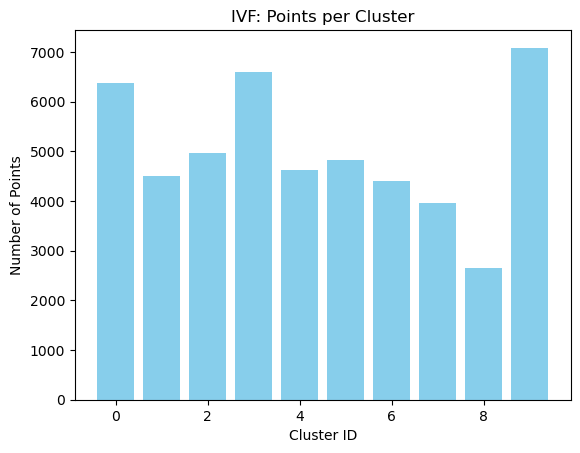

IVF (nprobe=1): MRR = 0.9266, Precision@100 = 0.8354, Hit Rate = 0.9985, Avg Comparisons = 5329.18
IVF (nprobe=2): MRR = 0.9337, Precision@100 = 0.8406, Hit Rate = 0.9991, Avg Comparisons = 10765.04
IVF (nprobe=5): MRR = 0.9347, Precision@100 = 0.8412, Hit Rate = 0.9995, Avg Comparisons = 26092.39
IVF (nprobe=10): MRR = 0.9348, Precision@100 = 0.8411, Hit Rate = 0.9996, Avg Comparisons = 50000.00


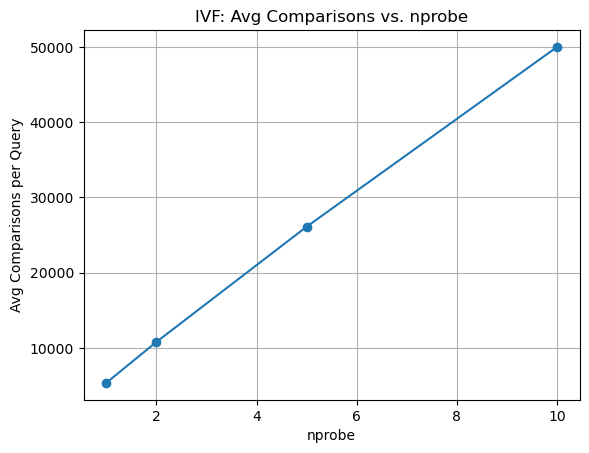

In [2]:
n_clusters = 10
centroids, inverted_index, assignments, kmeans_model = build_ivf_index(train_embeddings, n_clusters=n_clusters)

cluster_sizes = [len(inverted_index[i]) for i in range(n_clusters)]
plt.figure()
plt.bar(range(n_clusters), cluster_sizes, color='skyblue')
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")
plt.title("IVF: Points per Cluster")
plt.show()

ivf_results = {}
for nprobe in [1, 2, 5, 10]:
    mrr_ivf, prec_ivf, hit_ivf, comp_ivf = compute_ivf_retrieval_metrics(
        test_embeddings, test_labels, train_embeddings, train_labels, centroids, inverted_index,
        nprobe=nprobe, k=100, metric='euclidean')
    ivf_results[nprobe] = {'MRR': mrr_ivf, 'Precision': prec_ivf, 'HitRate': hit_ivf, 'AvgComparisons': comp_ivf}
    print(f"IVF (nprobe={nprobe}): MRR = {mrr_ivf:.4f}, Precision@100 = {prec_ivf:.4f}, Hit Rate = {hit_ivf:.4f}, Avg Comparisons = {comp_ivf:.2f}")

avg_comps_ivf = [ivf_results[np]['AvgComparisons'] for np in [1, 2, 5, 10]]
plt.figure()
plt.plot([1, 2, 5, 10], avg_comps_ivf, marker='o', linestyle='-')
plt.xlabel("nprobe")
plt.ylabel("Avg Comparisons per Query")
plt.title("IVF: Avg Comparisons vs. nprobe")
plt.grid(True)
plt.show()

### Analysis

Comparision of metrics: (both parts together)

IVF:

IVF (nprobe=1): MRR = 0.9266, Precision@100 = 0.8354, Hit Rate = 0.9985, Avg Comparisons = 5329.18

IVF (nprobe=2): MRR = 0.9337, Precision@100 = 0.8406, Hit Rate = 0.9991, Avg Comparisons = 10765.04

IVF (nprobe=5): MRR = 0.9347, Precision@100 = 0.8412, Hit Rate = 0.9995, Avg Comparisons = 26092.39

IVF (nprobe=10): MRR = 0.9348, Precision@100 = 0.8411, Hit Rate = 0.9996, Avg Comparisons = 50000.00

<hr>

LSH: (for full train set at hyperplanes = 7)

Accuracy: 89.99000000000001 %
Mean Reciprocal Rank: 0.8999
Precision at k: 0.04656300000000001
Hit Rate: 0.9619

<hr>

Simple k-means

Mean Reciprocal Rank: 0.1935
Precision@100: 0.018963
Hit Rate: 0.9017

